# 📘 Iris Dataset Mini Project

## 🔍 Problem Statement
We aim to analyze the Iris dataset to:

- Classify flower species using **Logistic Regression** (Supervised Learning).
- Group similar flowers using **K-Means Clustering** (Unsupervised Learning).
- Evaluate both models and summarize insights from data analysis.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 📊 Load and Understand the Dataset

In [24]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## 📈 Exploratory Data Analysis (EDA)
#### Checking nulls

In [27]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### Pairplot

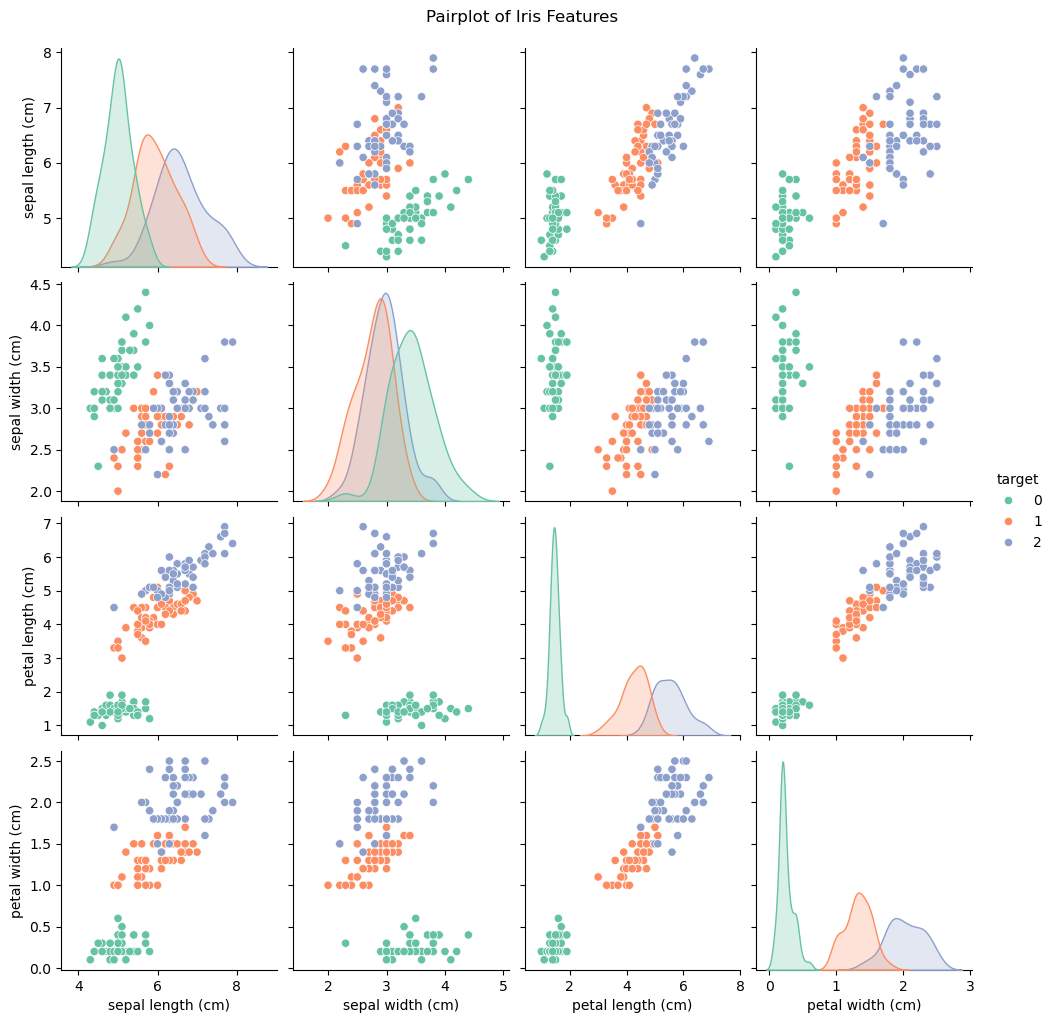

In [28]:
sns.pairplot(df, hue='target', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

#### Correlation Heatmap

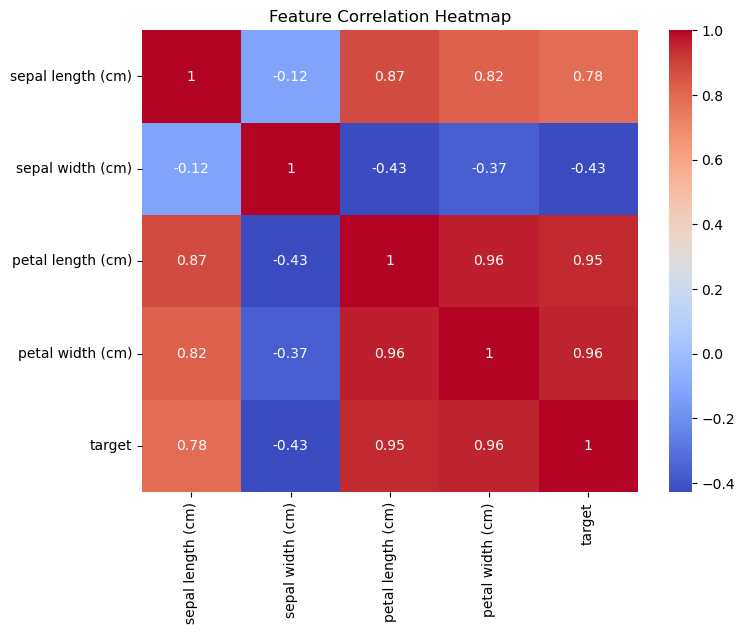

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## 🤖 Supervised Learning - Logistic Regression

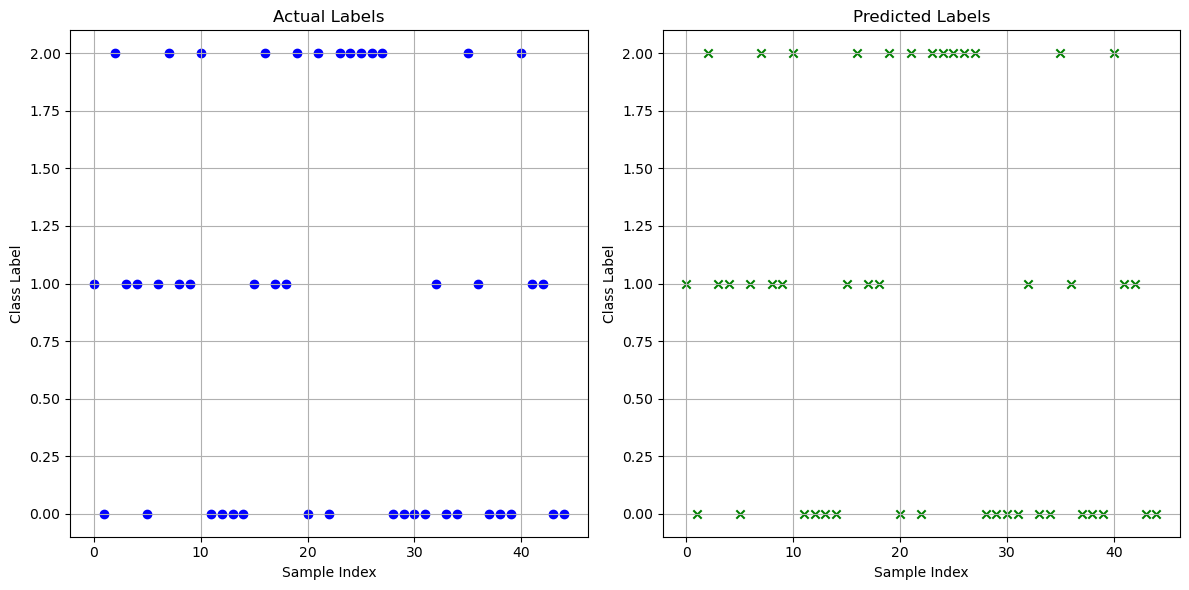

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))

# Actual values
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, c='blue', label='Actual', marker='o')
plt.title('Actual Labels')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.grid(True)

# Predicted values
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_pred)), y_pred, c='green', label='Predicted', marker='x')
plt.title('Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.grid(True)

plt.tight_layout()
plt.show()

#### Evaluation

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## 🔓 Unsupervised Learning - K-Means Clustering

In [32]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#### Silhouette Score (Internal evaluation metric)
Measures how well each point fits into its cluster.

Ranges from -1 (bad) to +1 (well clustered).

In [33]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, y_kmeans)
print("Silhouette Score:", score)#for checking


Silhouette Score: 0.551191604619592


### 📉 Dimensionality Reduction (PCA for Visualization)

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centroids_pca = pca.transform(kmeans.cluster_centers_)

### 🎨 Visualize Clustering with PCA

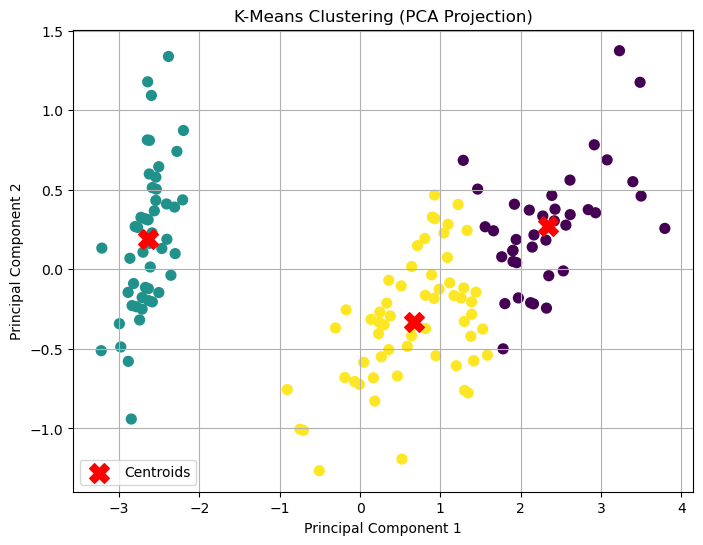

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering (PCA Projection)")
plt.legend()
plt.grid(True)
plt.show()

## ✅ Conclusion
- Logistic Regression achieved high accuracy (~97%) in classifying Iris species.
- K-Means clustering successfully grouped the data into 3 clusters that largely align with true species.
- PCA effectively reduced dimensions and made the data easier to visualize.
- The Iris dataset is ideal for both supervised and unsupervised learning techniques.